# Naive Bayes Classification - Expertise Level Prediction

This notebook implements multiple Naive Bayes classifiers to predict user expertise levels based on Stack Overflow user profile features. The classifiers used include:

- Multinomial Naive Bayes
- Gaussian Naive Bayes
- Complement Naive Bayes
- Categorical Naive Bayes

In [138]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay


## Load the Dataset

In [139]:
user_details_data = pd.read_csv("/Users/akhilaannireddy/Projects/Machine_learning_project/Dataset/cleaned_user_data.csv")
user_details_data.head()

,user_id,display_name,reputation,profile_image,user_type,link,account_id,is_employee,last_modified_date,last_access_date,...,reputation_change_week,reputation_change_day,creation_date,accept_rate,badge_bronze,badge_silver,badge_gold,account_age_days,account_age_years,age_group
0,109,Kalid,22690,https://www.gravatar.com/avatar/5117b4aacf8b64...,registered,https://stackoverflow.com/users/109/kalid,91,False,2025-01-17 19:05:00,2015-10-10 21:32:52,...,10,0,2008-08-02 00:20:47,88.0,46,45,14,6029,16.5,15-18 Years
1,347807,CristiC,22688,https://www.gravatar.com/avatar/6023ac67694f90...,registered,https://stackoverflow.com/users/347807/cristic,141059,False,2024-04-09 05:40:03,2025-01-23 03:52:19,...,10,0,2010-05-22 13:10:40,96.0,89,61,13,5370,14.7,12-15 Years
2,3427777,fantabolous,22686,https://www.gravatar.com/avatar/34dac9c01fc709...,registered,https://stackoverflow.com/users/3427777/fantab...,4096755,False,2024-10-25 20:10:00,2024-12-09 04:11:00,...,0,0,2014-03-17 06:40:33,80.0,52,57,8,3976,10.9,10-12 Years
3,1858116,Gabriele Santomaggio,22682,https://i.sstatic.net/fQDZf.jpg?s=256,registered,https://stackoverflow.com/users/1858116/gabrie...,2087535,False,2023-12-25 15:00:00,2025-01-27 14:19:21,...,0,0,2012-11-27 23:02:03,78.0,59,58,4,4450,12.2,12-15 Years
4,13767,Rafał Rawicki,22680,https://www.gravatar.com/avatar/b043ead577679f...,registered,https://stackoverflow.com/users/13767/rafa%c5%...,7838,False,2024-05-08 11:00:00,2023-07-05 09:38:01,...,0,0,2008-09-16 20:48:13,88.0,79,63,5,5983,16.4,15-18 Years


## Create Expertise Level Target

In [140]:
expertise_labels = ['Beginner', 'Intermediate', 'Advanced', 'Expert']
user_details_data['expertise_level'] = pd.qcut(user_details_data['reputation'], q=4, labels=expertise_labels)

## Data Cleaning

In [141]:
user_details_data.drop(columns=['reputation'], inplace=True)

In [142]:
print(user_details_data.dtypes)

user_id                         int64
display_name                   object
profile_image                  object
user_type                      object
link                           object
account_id                      int64
is_employee                      bool
last_modified_date             object
last_access_date               object
reputation_change_year          int64
reputation_change_quarter       int64
reputation_change_month         int64
reputation_change_week          int64
reputation_change_day           int64
creation_date                  object
accept_rate                   float64
badge_bronze                    int64
badge_silver                    int64
badge_gold                      int64
account_age_days                int64
account_age_years             float64
age_group                      object
expertise_level              category
dtype: object


## Feature Selection for Count-Based Models

In [143]:
features = [
    'reputation_change_year',
    'reputation_change_quarter',
    'reputation_change_month',
    'reputation_change_week',
    'reputation_change_day',
    'badge_bronze',
    'badge_silver',
    'badge_gold',
    'account_age_days'
]

Dataset Changes:

Selected count-based features such as reputation changes, badge counts, and account age.
Filled missing values with zero.
Filtered out rows with any negative values.
Reason: Multinomial Naive Bayes requires discrete, non-negative features since it is based on word or event frequencies. The preprocessing ensures all feature values are compatible with this requirement, enabling the model to interpret them as counts.

In [144]:
X = user_details_data[features].fillna(0)

non_negative_mask = (X >= 0).all(axis=1)
X = X[non_negative_mask]
y = user_details_data.loc[non_negative_mask, 'expertise_level']

In [145]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [146]:
X_with_target = X.copy()
X_with_target['expertise_level'] = y

X_with_target.to_csv("Multinomial_data.csv", index=False)

Selected relevant numerical features such as reputation changes, badge counts, and account age.
Filled missing values with 0 to handle incomplete data.
Filtered out any rows with negative values to ensure compatibility with Naive Bayes models.
Extracted the target variable expertise_level.
Encoded the categorical target labels into numeric format using LabelEncoder for model training.

## Multinomial Naive Bayes

In [147]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Training Set Shape:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("\nTesting Set Shape:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Training Set Shape:
X_train: (81194, 9)
y_train: (81194,)

Testing Set Shape:
X_test: (20299, 9)
y_test: (20299,)


In [148]:
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

 Accuracy: 0.41302527218089563

 Classification Report:
               precision    recall  f1-score   support

    Advanced       0.32      0.33      0.32      5067
    Beginner       0.40      0.69      0.50      5108
      Expert       0.67      0.49      0.57      5038
Intermediate       0.29      0.14      0.19      5086

    accuracy                           0.41     20299
   macro avg       0.42      0.41      0.40     20299
weighted avg       0.42      0.41      0.40     20299



The Naive Bayes model achieved an accuracy of 41.3% on the test set. It performed best in identifying Beginner and Expert users, with Beginner having the highest recall (0.69) and Expert showing the highest precision (0.67). The model struggled with the Intermediate and Advanced classes, particularly with Intermediate, which had a recall of only 0.14. Overall, the performance indicates that while the model can detect clear patterns at the extremes, it has difficulty distinguishing mid-level expertise categories.

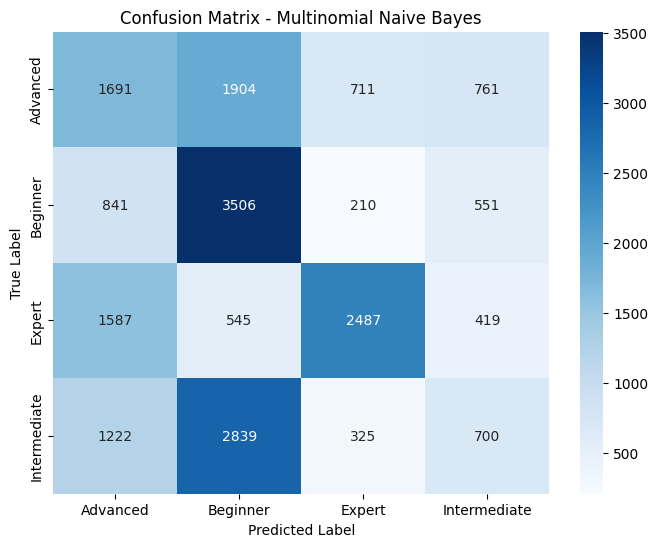

In [149]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title("Confusion Matrix - Multinomial Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Beginner class was predicted most accurately (3,506 correct).
Many Intermediate users were wrongly predicted as Beginner (2,839).
Expert predictions were fairly accurate (2,487 correct), but some were confused with Advanced.
Advanced class had the most confusion, often predicted as Beginner or Expert.
Overall, the model performs well for Beginner and Expert, but struggles to separate Intermediate and Advanced users.

## Gaussian Naive Bayes

In [150]:
features = [
    'badge_bronze', 'badge_silver', 'badge_gold',
    'reputation_change_year', 'reputation_change_quarter',
    'reputation_change_month', 'reputation_change_week',
    'reputation_change_day', 'account_age_days',
    'accept_rate', 'account_age_years'
]

Dataset Changes:

Included additional continuous numerical features like accept_rate and account_age_years.
Kept all real-valued features without discretizing.
Handled missing data by filling it with zero.
Reason: Gaussian Naive Bayes assumes that features are normally distributed and continuous. No transformation or encoding was needed beyond filling missing values, allowing the model to work directly with the raw numeric values.

In [151]:
X = user_details_data[features].copy()
X = X.fillna(0)

X = X[(X >= 0).all(axis=1)]
y = user_details_data.loc[X.index, 'expertise_level']

In [152]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [153]:
X_with_target = X.copy()
X_with_target['expertise_level'] = y

X_with_target.to_csv("gausian_dataframe.csv", index=False)

In [154]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Training Set Shape:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("\nTesting Set Shape:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Training Set Shape:
X_train: (81194, 11)
y_train: (81194,)

Testing Set Shape:
X_test: (20299, 11)
y_test: (20299,)


In [155]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

GaussianNB Accuracy: 0.4044041578402877

Classification Report:
               precision    recall  f1-score   support

    Advanced       0.32      0.27      0.29      5067
    Beginner       0.39      0.83      0.53      5108
      Expert       0.85      0.35      0.50      5038
Intermediate       0.27      0.16      0.20      5086

    accuracy                           0.40     20299
   macro avg       0.46      0.40      0.38     20299
weighted avg       0.46      0.40      0.38     20299



The Gaussian Naive Bayes model achieved an accuracy of 40.4%. It showed strong performance in identifying Beginner users, with a high recall of 0.83, meaning it correctly identified most users in that class. The Expert class had the highest precision (0.85) but lower recall, indicating the model was confident when predicting Expert but often missed some. Performance was weakest for Intermediate and Advanced classes, both showing low precision and recall. Overall, the model effectively captured the extremes but struggled with mid-level expertise categories.

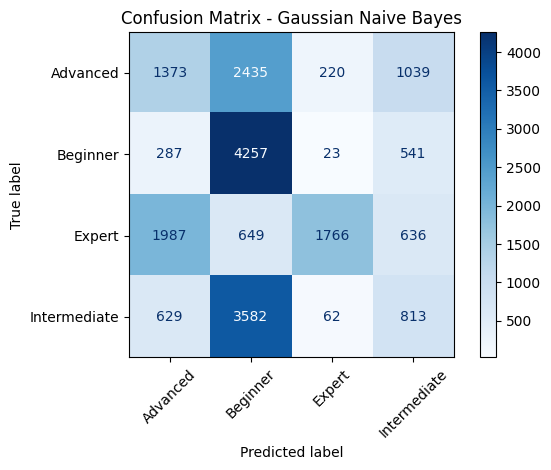

In [156]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.tight_layout()
plt.show()

The Gaussian Naive Bayes model shows a strong bias toward predicting the Beginner class, as seen by high misclassification of other classes into this category—especially Intermediate and Advanced users. While it performs fairly well at correctly identifying Beginner users (4257 correct predictions), it struggles significantly with Intermediate and Expert classes, often confusing them with Beginners. This suggests that the model captures patterns at the lower end of expertise more effectively than at mid or high levels.

## Complement Naive bayes

In [157]:
features = [
    'reputation_change_year',
    'reputation_change_quarter',
    'reputation_change_month',
    'reputation_change_week',
    'reputation_change_day',
    'badge_bronze',
    'badge_silver',
    'badge_gold',
    'account_age_days'
]


Dataset Changes:

Used the same count-based features as in MultinomialNB.
Ensured all feature values were non-negative and filled missing values with zero.
Reason: Complement Naive Bayes is designed for imbalanced classification tasks and works similarly to MultinomialNB. The dataset preparation follows the same principles, focusing on count-like features that are suitable for the complement approach.

In [158]:
X = user_details_data[features].fillna(0)
X = X[(X >= 0).all(axis=1)]
y = user_details_data.loc[X.index, 'expertise_level']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [159]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Training Set Shape:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("\nTesting Set Shape:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Training Set Shape:
X_train: (81194, 9)
y_train: (81194,)

Testing Set Shape:
X_test: (20299, 9)
y_test: (20299,)


In [160]:
cnb = ComplementNB()
cnb.fit(X_train, y_train)

y_pred = cnb.predict(X_test)

print(" ComplementNB Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

 ComplementNB Accuracy: 0.39366471254741614

 Classification Report:
               precision    recall  f1-score   support

    Advanced       0.00      0.00      0.00      5067
    Beginner       0.33      0.87      0.48      5108
      Expert       0.52      0.70      0.59      5038
Intermediate       0.23      0.00      0.01      5086

    accuracy                           0.39     20299
   macro avg       0.27      0.39      0.27     20299
weighted avg       0.27      0.39      0.27     20299



/opt/anaconda3/envs/mlpro/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/mlpro/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/mlpro/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The Complement Naive Bayes model achieved an accuracy of 39.4%. It performed well in identifying Beginner users, with a high recall of 0.87, and showed decent performance for the Expert class (precision 0.52, recall 0.70). However, the model failed to correctly classify any Advanced users and performed very poorly on the Intermediate class as well. The macro and weighted averages for precision, recall, and f1-score were low, indicating imbalance in performance across classes. Overall, the model heavily favored Beginner and Expert predictions but struggled significantly with the other categories.

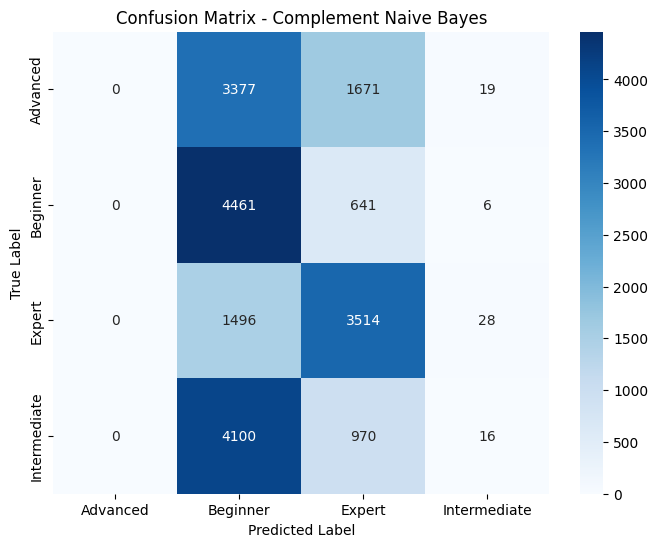

In [161]:
cm = confusion_matrix(y_test, y_pred)
labels = le.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Complement Naive Bayes")
plt.show()

Beginner class was predicted the most, including many misclassified samples from other classes.
The model predicted zero instances as Advanced, indicating a complete failure to detect that class.
Intermediate users were largely misclassified as Beginner or Expert, with almost no correct predictions.
Expert class had relatively balanced performance, but still included misclassifications from the Beginner and Intermediate classes.
Overall, the model shows bias toward the Beginner class, often predicting other classes as Beginner, which may indicate skewed feature influence or class imbalance.

## Categorical Naive bayes

In [162]:
categorical_cols = ['user_type', 'age_group', 'is_employee']
numeric_cols = [
    'accept_rate', 'badge_bronze', 'badge_silver', 'badge_gold',
    'reputation_change_year', 'reputation_change_month',
    'reputation_change_week', 'account_age_days'
]

Dataset Changes:

Converted categorical features (e.g., user_type, age_group) to numeric form using label encoding.
Discretized continuous numeric features (e.g., accept_rate, badge counts) into bins using quantile-based binning.
Reason: Categorical Naive Bayes is intended for features with distinct categories rather than continuous values. Label encoding and binning transform all features into ordinal/categorical types that the model can process.

In [163]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    user_details_data[col] = le.fit_transform(user_details_data[col].astype(str))
    label_encoders[col] = le

kbd = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
user_details_data[numeric_cols] = kbd.fit_transform(user_details_data[numeric_cols].fillna(0))

features = categorical_cols + numeric_cols
X = user_details_data[features]

target = 'expertise_level'
le_target = LabelEncoder()
y = le_target.fit_transform(user_details_data[target])

/opt/anaconda3/envs/mlpro/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 6 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [164]:
X_with_target = X.copy()
X_with_target['expertise_level'] = y

X_with_target.to_csv("categorical_dtataframe.csv", index=False)

In [165]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training Set Shape:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("\nTesting Set Shape:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Training Set Shape:
X_train: (83840, 11)
y_train: (83840,)

Testing Set Shape:
X_test: (20960, 11)
y_test: (20960,)


Categorical features (user_type, age_group, is_employee) are label encoded to convert them into numeric form.
Numerical features are binned into categories using KBinsDiscretizer to make them suitable for CategoricalNB.
Final feature set combines both encoded categorical and discretized numeric columns.
The target variable expertise_level is label encoded.
Data is split into training and testing sets using stratified sampling to maintain class balance.

In [166]:
model = CategoricalNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(" CategoricalNB Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred, target_names=le_target.classes_))

 CategoricalNB Accuracy: 0.4548187022900763

 Classification Report:
               precision    recall  f1-score   support

    Advanced       0.34      0.30      0.32      5239
    Beginner       0.44      0.64      0.52      5244
      Expert       0.62      0.71      0.66      5240
Intermediate       0.33      0.17      0.23      5237

    accuracy                           0.45     20960
   macro avg       0.43      0.45      0.43     20960
weighted avg       0.43      0.45      0.43     20960



The Categorical Naive Bayes model achieved an accuracy of 45.5%, the highest among all the Naive Bayes models tested. It performed best on the Expert class, with a precision of 0.62 and recall of 0.71, followed by solid performance on the Beginner class (precision 0.44, recall 0.64). The Advanced and Intermediate classes showed weaker results, particularly with lower recall. Overall, this model showed a more balanced classification ability compared to others, especially in identifying Expert users more accurately.

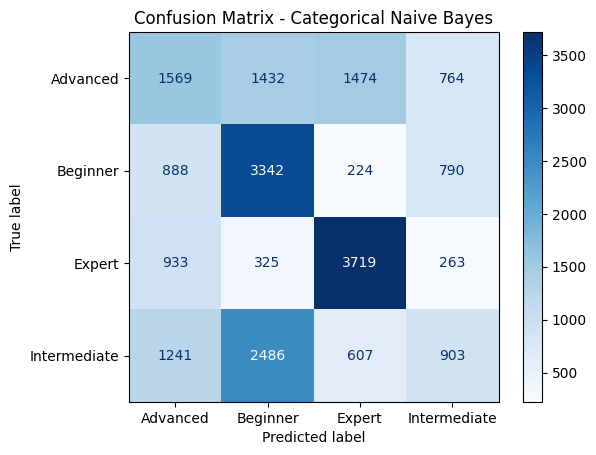

In [167]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_target.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Categorical Naive Bayes")
plt.show()

Expert and Beginner classes are predicted most accurately.
3719 Expert and 3342 Beginner users were correctly classified.
Advanced and Intermediate classes had higher misclassifications.
Intermediate users were often predicted as Beginner.
Overall, the model performs best at the extremes, with more confusion in mid-level classes.